In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math

In [0]:
import tensorflow as tf
from tensorflow.keras import  Sequential
from tensorflow.keras.models import  Model
from tensorflow.keras.layers import InputLayer, Input, Reshape, MaxPool2D, Conv2D, Dense, Flatten, Activation, Dropout, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, ZeroPadding2D 
from tensorflow.keras import regularizers, optimizers
from keras.initializers import glorot_uniform


In [6]:
#Read the data from mnist in tensofflow
from tensorflow.examples.tutorials.mnist import input_data
data=input_data.read_data_sets('data/MNIST/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
#Define some static variables

img_size= 28 # Image size
img_size_flat= img_size*img_size
num_classes=10 #Number of the classes
num_channels=1 # Number of channel 

###Load data

In [0]:
X_train_org=np.array(data.train.images.reshape((-1, img_size, img_size)))
X_test_org=np.array(data.test.images.reshape((-1, img_size, img_size)))

y_train=np.array(data.train.labels)
y_test=np.array(data.test.labels)

y_train_cls=np.argmax(y_train, axis=1)
y_test_cls=np.argmax(y_test, axis=1)

###Function to plot images

In [0]:
def plot_images(images, cls_true, cls_pred=None):
    plt.figure(figsize=(10,10))
    
    for i in range(min(25, len(images))):
        plt.subplot(5, 5, i+1)
        if cls_pred is None:
            plt.xlabel('True {0}'.format(cls_true[i]))
        else:
            plt.xlabel('True {0}, Pred: {1}'.format(cls_true[i], cls_pred[i]))
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i])
    plt.show()


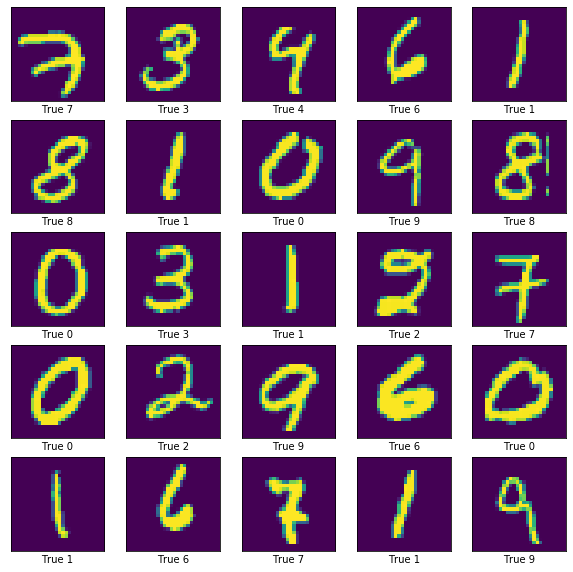

In [22]:
## Plot some images to see the true label in train dataset

plot_images(X_train_org, y_train_cls)

###Function to plot wrong prdictions  

In [0]:
def plot_wrong_predictions(images, cls_true, cls_pred):
    mask=cls_true != cls_pred
    wrong_predictions= images[mask]

    plot_images(wrong_predictions, cls_true[mask], cls_pred[mask])

### Design the model 

In [0]:
#Normalize the data
X_train=X_train_org/255
X_test=X_test_org/255

In [0]:
X_input=Input(shape=(img_size, img_size))

#Reshape the input
inputs= Reshape((img_size, img_size, num_channels)) (X_input)

#First layeyes with re-lu activation and maxpooling
inputs=Conv2D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu') (inputs)
inputs=MaxPool2D(pool_size=2, strides=2) (inputs)

#Second layer with relu function and max pooling
inputs=Conv2D(filters=36, kernel_size=5, strides=1, padding='same', activation='relu') (inputs)
inputs=MaxPool2D(pool_size=2, strides=2) (inputs)

#Flatten layers
inputs=Flatten() (inputs)

#Fully conected
inputs=Dense(128, activation='relu') (inputs)

#Last fully connected layers
inputs=Dense(num_classes, activation='softmax') (inputs)

outputs=inputs

### Model Compilation

In [0]:
model=Model(inputs=X_input, outputs=outputs)

In [37]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1764)              0   

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [39]:
#Fit model
history=model.fit(X_train, y_train, batch_size=256, epochs=8, validation_data=(X_test, y_test))

Train on 55000 samples, validate on 10000 samples
Epoch 1/8
55000/55000 [==============================] - 57s 1ms/sample - loss: 1.5584 - acc: 0.4686 - val_loss: 0.5949 - val_acc: 0.8160
Epoch 2/8
55000/55000 [==============================] - 56s 1ms/sample - loss: 0.4718 - acc: 0.8558 - val_loss: 0.3715 - val_acc: 0.8894
Epoch 3/8
55000/55000 [==============================] - 56s 1ms/sample - loss: 0.3395 - acc: 0.8974 - val_loss: 0.2875 - val_acc: 0.9128
Epoch 4/8
55000/55000 [==============================] - 56s 1ms/sample - loss: 0.2738 - acc: 0.9172 - val_loss: 0.2387 - val_acc: 0.9263
Epoch 5/8
55000/55000 [==============================] - 56s 1ms/sample - loss: 0.2281 - acc: 0.9307 - val_loss: 0.1998 - val_acc: 0.9396
Epoch 6/8
55000/55000 [==============================] - 56s 1ms/sample - loss: 0.1932 - acc: 0.9414 - val_loss: 0.1687 - val_acc: 0.9486
Epoch 7/8
55000/55000 [==============================] - 56s 1ms/sample - loss: 0.1702 - acc: 0.9481 - val_loss: 0.1458 - 

### Evaluation

In [48]:
results=model.evaluate(x=X_test, y=y_test)

10000/10000 [==============================] - 5s 465us/sample - loss: 0.1377 - acc: 0.9574


In [49]:
for name, value in zip(model.metrics_names, results):
    print(name, value)

loss 0.13770739767849446
acc 0.9574


### Plot some exmales of the incorrect predictions

In [0]:
y_pred=model.predict(x=X_test)

In [0]:
y_pred_cls=np.argmax(y_pred, axis=1)

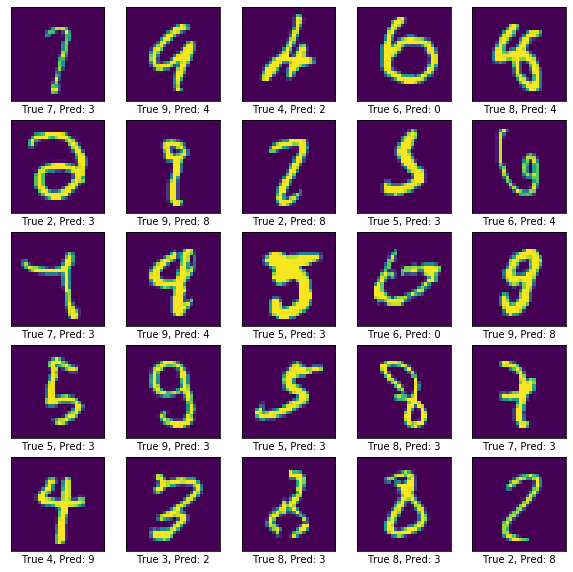

In [82]:
#plot some incorrect prediction
plot_wrong_predictions(X_test_org, y_test_cls, y_pred_cls)

### Plot the accuraccy and loss function

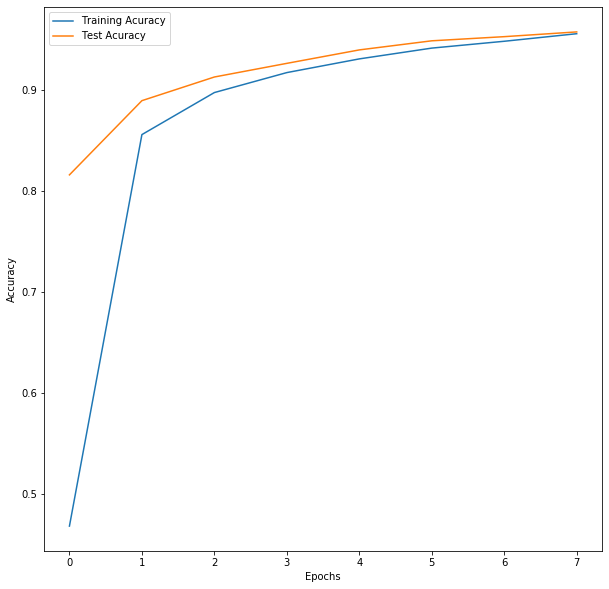

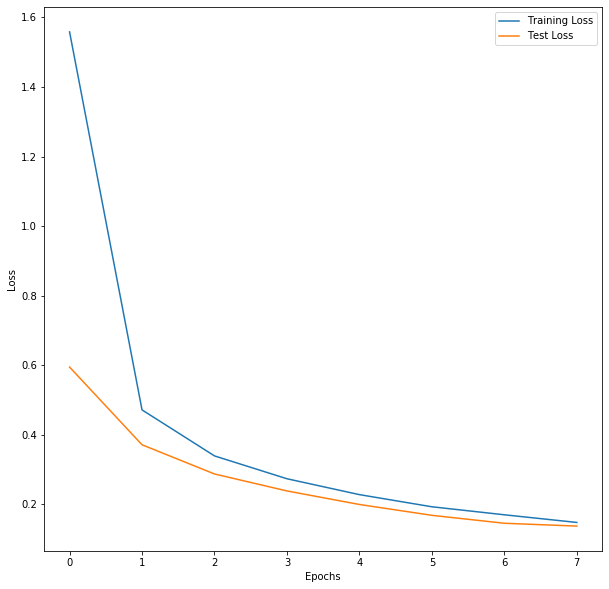

In [84]:
# Plot the accuraccy and loss function
#Plot accuracy
plt.figure(figsize=(10,10))
plt.plot(history.history['acc'], label='Training Acuracy')
plt.plot(history.history['val_acc'], label='Test Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

#Plot loss 
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

### Save and Load model

In [0]:
path_model= 'model.keras'
model.save(path_model)
del model

In [0]:
from tensorflow.python.keras.models import load_model

In [87]:
model1=load_model(path_model)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
y_pred=model1.predict(x=X_test)
y_pred_cls=np.argmax(y_pred, axis=1)

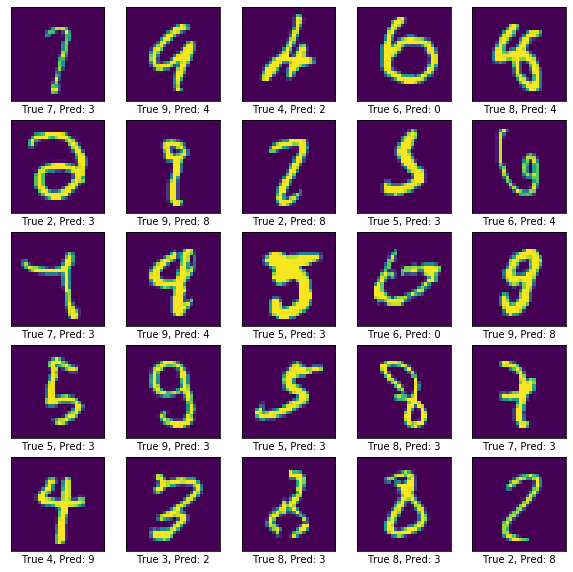

In [89]:
plot_wrong_predictions(X_test_org, y_test_cls, y_pred_cls)